#### Imports

In [1]:
from data_process.file_wrapper import FileWrapper
from data_process.utils import get_by_path
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%matplotlib widget

#### Load static-calibrated IMU data

In [2]:
# data = FileWrapper('/home/ntkot/Desktop/theses/ros/bag_db/data_14_07_2023__20_43_44/rosbag2_14_07_2023__20_43_44/rosbag2_14_07_2023__20_43_44.pkl')
data = FileWrapper('/home/ntkot/theses/ros/bag_db/data_28_08_2023__23_00_37/split1/split1.pkl')
# print(*data.tree(), sep='\n')

imu_sc_time_ns = get_by_path(data.data, ['/imu/static_calib', 'time_ns'])
imu_sc_time = (imu_sc_time_ns - imu_sc_time_ns[0]) / 1e9
imu_sc_time_diff = imu_sc_time[1:len(imu_sc_time)] - imu_sc_time[0:len(imu_sc_time)-1]
imu_sc_sample_rate = 1 / np.average(imu_sc_time_diff)

a_x_sc = get_by_path(data.data, ['/imu/static_calib', 'linear_acceleration', 'x'])
a_y_sc = get_by_path(data.data, ['/imu/static_calib', 'linear_acceleration', 'y'])
a_z_sc = get_by_path(data.data, ['/imu/static_calib', 'linear_acceleration', 'z'])
g_x_sc = get_by_path(data.data, ['/imu/static_calib', 'angular_velocity', 'x'])
g_y_sc = get_by_path(data.data, ['/imu/static_calib', 'angular_velocity', 'y'])
g_z_sc = get_by_path(data.data, ['/imu/static_calib', 'angular_velocity', 'z'])

Loading from pickle file...


#### Low Pass Butterworth - Acceleration

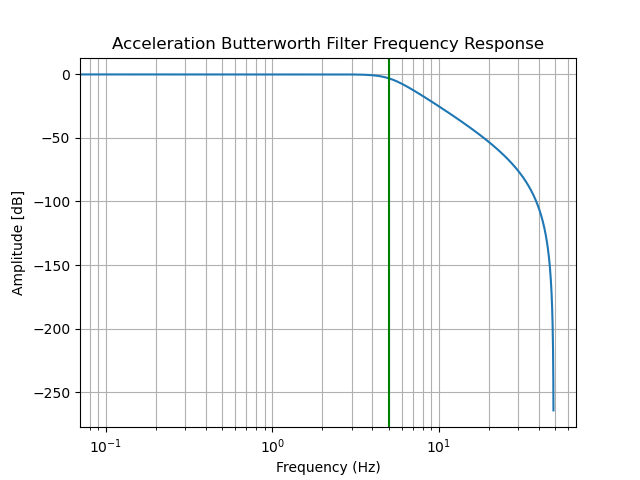

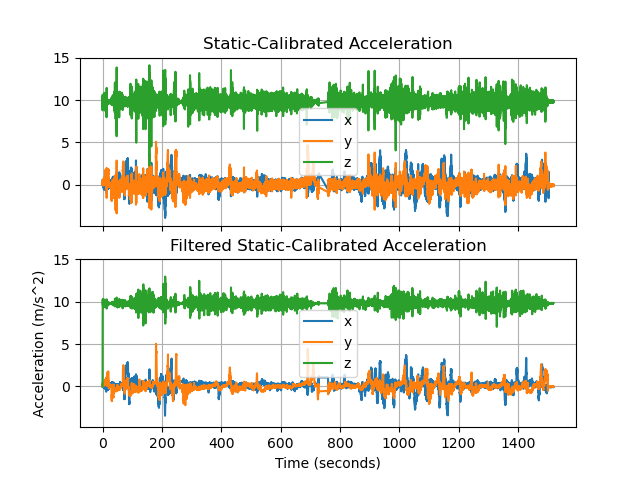

In [3]:
a_butter_order = 4
a_butter_3db = 5
a_butter_b, a_butter_a = signal.butter(a_butter_order, a_butter_3db, 'lowpass', fs=imu_sc_sample_rate, output='ba')
a_butter_w, a_butter_h = signal.freqz(a_butter_b, a_butter_a, fs=imu_sc_sample_rate)

a_butter_response_fig = plt.figure(0)
a_butter_response_fig.clear()
plt.semilogx(a_butter_w, 20 * np.log10(abs(a_butter_h)))
# plt.margins(0, 0.1)
plt.axvline(a_butter_3db, color='green') # cutoff frequency
plt.title('Acceleration Butterworth Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

a_x_sc_butter = signal.lfilter(a_butter_b, a_butter_a, a_x_sc)
a_y_sc_butter = signal.lfilter(a_butter_b, a_butter_a, a_y_sc)
a_z_sc_butter = signal.lfilter(a_butter_b, a_butter_a, a_z_sc)

a_butter_fig = plt.figure(1)
a_butter_fig.clear()
a_butter_fig, a_butter_ax = plt.subplots(num=1, nrows=2, ncols=1, sharex='all', sharey='all')
a_butter_ax[0].plot(imu_sc_time, a_x_sc)
a_butter_ax[0].plot(imu_sc_time, a_y_sc)
a_butter_ax[0].plot(imu_sc_time, a_z_sc)
a_butter_ax[0].legend(['x','y','z'])
a_butter_ax[0].set_ylabel('Acceleration (m/s^2)')
a_butter_ax[0].set_title('Static-Calibrated Acceleration')
a_butter_ax[0].grid(which='both', axis='both')
a_butter_ax[1].plot(imu_sc_time, a_x_sc_butter)
a_butter_ax[1].plot(imu_sc_time, a_y_sc_butter)
a_butter_ax[1].plot(imu_sc_time, a_z_sc_butter)
a_butter_ax[1].legend(['x','y','z'])
a_butter_ax[1].set_xlabel('Time (seconds)')
a_butter_ax[1].set_ylabel('Acceleration (m/s^2)')
a_butter_ax[1].set_title('Filtered Static-Calibrated Acceleration')
a_butter_ax[1].grid(which='both', axis='both')
plt.show()

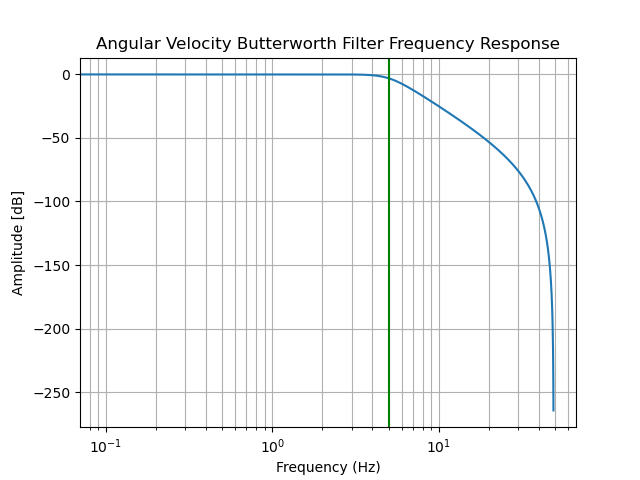

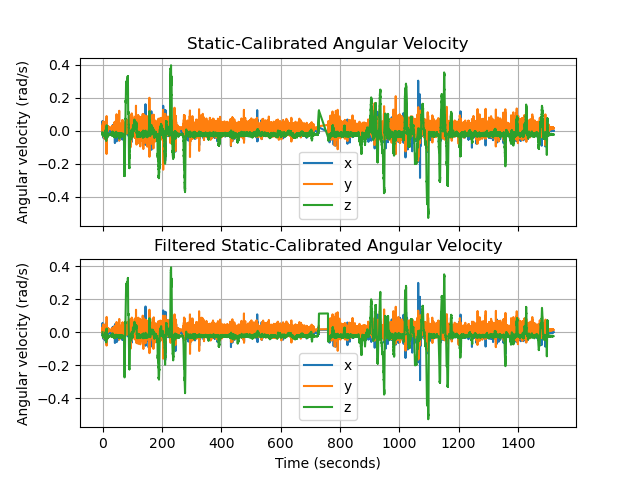

In [5]:
g_butter_order = 4
g_butter_3db = 5
g_butter_b, g_butter_a = signal.butter(g_butter_order, g_butter_3db, 'lowpass', fs=imu_sc_sample_rate, output='ba')
g_butter_w, g_butter_h = signal.freqz(g_butter_b, g_butter_a, fs=imu_sc_sample_rate)

g_butter_response_fig = plt.figure(2)
g_butter_response_fig.clear()
plt.semilogx(g_butter_w, 20 * np.log10(abs(g_butter_h)))
# plt.margins(0, 0.1)
plt.axvline(g_butter_3db, color='green') # cutoff frequency
plt.title('Angular Velocity Butterworth Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

g_x_sc_butter = signal.lfilter(g_butter_b, g_butter_a, g_x_sc)
g_y_sc_butter = signal.lfilter(g_butter_b, g_butter_a, g_y_sc)
g_z_sc_butter = signal.lfilter(g_butter_b, g_butter_a, g_z_sc)

g_butter_fig = plt.figure(3)
g_butter_fig.clear()
g_butter_fig, g_butter_ax = plt.subplots(num=3, nrows=2, ncols=1, sharex='all', sharey='all')
g_butter_ax[0].plot(imu_sc_time, g_x_sc)
g_butter_ax[0].plot(imu_sc_time, g_y_sc)
g_butter_ax[0].plot(imu_sc_time, g_z_sc)
g_butter_ax[0].legend(['x','y','z'])
g_butter_ax[0].set_ylabel('Angular velocity (rad/s)')
g_butter_ax[0].set_title('Static-Calibrated Angular Velocity')
g_butter_ax[0].grid(which='both', axis='both')
g_butter_ax[1].plot(imu_sc_time, g_x_sc_butter)
g_butter_ax[1].plot(imu_sc_time, g_y_sc_butter)
g_butter_ax[1].plot(imu_sc_time, g_z_sc_butter)
g_butter_ax[1].legend(['x','y','z'])
g_butter_ax[1].set_xlabel('Time (seconds)')
g_butter_ax[1].set_ylabel('Angular velocity (rad/s)')
g_butter_ax[1].set_title('Filtered Static-Calibrated Angular Velocity')
g_butter_ax[1].grid(which='both', axis='both')
plt.show()

#### Wiener - Acceleration

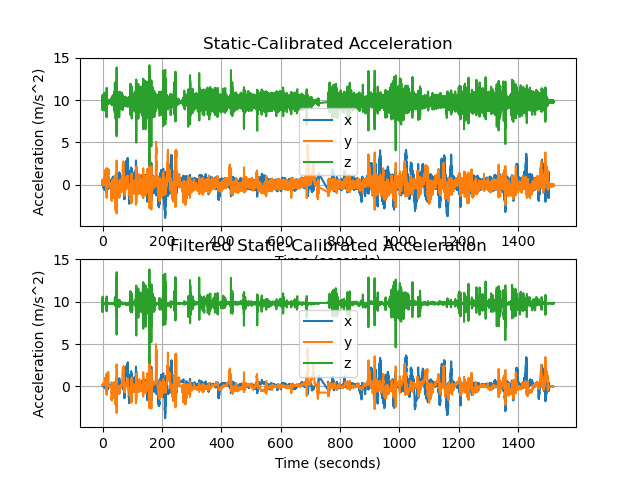

In [4]:
a_wiener_length = 100

a_x_sc_wiener = signal.wiener(a_x_sc, a_wiener_length)
a_y_sc_wiener = signal.wiener(a_y_sc, a_wiener_length)
a_z_sc_wiener = signal.wiener(a_z_sc, a_wiener_length)

a_wiener_fig = plt.figure(4)
a_wiener_fig.clear()
a_wiener_fig, a_wiener_ax = plt.subplots(num=4, nrows=2, ncols=1, sharex='all', sharey='all')
a_wiener_ax[0].plot(imu_sc_time, a_x_sc)
a_wiener_ax[0].plot(imu_sc_time, a_y_sc)
a_wiener_ax[0].plot(imu_sc_time, a_z_sc)
a_wiener_ax[0].legend(['x','y','z'])
a_wiener_ax[0].set_xlabel('Time (seconds)')
a_wiener_ax[0].tick_params(labelbottom=True)
a_wiener_ax[0].set_ylabel('Acceleration (m/s^2)')
a_wiener_ax[0].set_title('Static-Calibrated Acceleration')
a_wiener_ax[0].grid(which='both', axis='both')
a_wiener_ax[1].plot(imu_sc_time, a_x_sc_wiener)
a_wiener_ax[1].plot(imu_sc_time, a_y_sc_wiener)
a_wiener_ax[1].plot(imu_sc_time, a_z_sc_wiener)
a_wiener_ax[1].legend(['x','y','z'])
a_wiener_ax[1].set_xlabel('Time (seconds)')
a_wiener_ax[1].set_ylabel('Acceleration (m/s^2)')
a_wiener_ax[1].set_title('Filtered Static-Calibrated Acceleration')
a_wiener_ax[1].grid(which='both', axis='both')
plt.show()

#### Wiener - Gyroscope

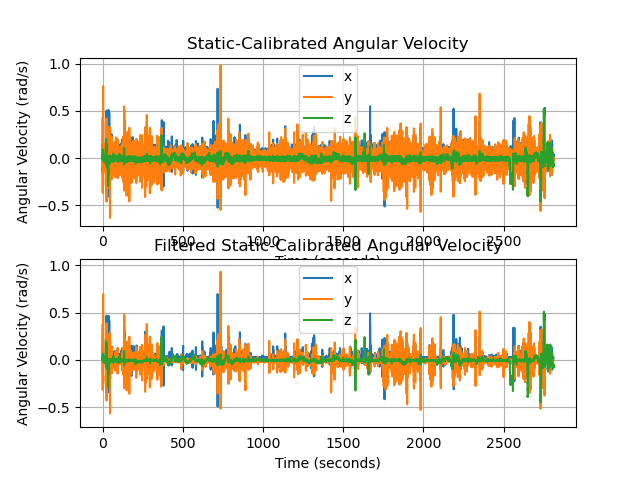

In [9]:
g_wiener_length = 100

g_x_sc_wiener = signal.wiener(g_x_sc, g_wiener_length)
g_y_sc_wiener = signal.wiener(g_y_sc, g_wiener_length)
g_z_sc_wiener = signal.wiener(g_z_sc, g_wiener_length)

g_wiener_fig = plt.figure(5)
g_wiener_fig.clear()
g_wiener_fig, g_wiener_ax = plt.subplots(num=5, nrows=2, ncols=1, sharex='all', sharey='all')
g_wiener_ax[0].plot(imu_sc_time, g_x_sc)
g_wiener_ax[0].plot(imu_sc_time, g_y_sc)
g_wiener_ax[0].plot(imu_sc_time, g_z_sc)
g_wiener_ax[0].legend(['x','y','z'])
g_wiener_ax[0].set_xlabel('Time (seconds)')
g_wiener_ax[0].tick_params(labelbottom=True)
g_wiener_ax[0].set_ylabel('Angular Velocity (rad/s)')
g_wiener_ax[0].set_title('Static-Calibrated Angular Velocity')
g_wiener_ax[0].grid(which='both', axis='both')
g_wiener_ax[1].plot(imu_sc_time, g_x_sc_wiener)
g_wiener_ax[1].plot(imu_sc_time, g_y_sc_wiener)
g_wiener_ax[1].plot(imu_sc_time, g_z_sc_wiener)
g_wiener_ax[1].legend(['x','y','z'])
g_wiener_ax[1].set_xlabel('Time (seconds)')
g_wiener_ax[1].set_ylabel('Angular Velocity (rad/s)')
g_wiener_ax[1].set_title('Filtered Static-Calibrated Angular Velocity')
g_wiener_ax[1].grid(which='both', axis='both')
plt.show()